In [1]:
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/MyDrive/AMPcontrol")
!ls

 Ampcontrol.ipynb
'Charging_events_data - charging_events_meter_reading.xlsx'
'Charging_events_data - charging_events_meter_reading.xlsx - Charging_events_data - charging.csv'
'Copy of Data_Frame_Info_py.ipynb'
 visaulization.pbix


In [4]:
import numpy as np
import pandas as pd

In [5]:
mh_dataset = pd.read_csv("/content/drive/MyDrive/AMPcontrol/Charging_events_data - charging_events_meter_reading.xlsx - Charging_events_data - charging.csv")

In [6]:
print(mh_dataset.head())

         Start Time  Meter Start (Wh)  Meter End(Wh)  Meter Total(Wh)  \
0  24.08.2018 09:50                50          50.00             0.00   
1  24.08.2018 09:51                50          50.00             0.00   
2  24.08.2018 09:51                73         118.52            45.52   
3  24.08.2018 09:53               105         116.66            11.66   
4  24.08.2018 09:54               121         144.77            23.77   

   Total Duration (s) Charger_name  
0                  37          NaN  
1                  38          NaN  
2                  56          NaN  
3                  76          NaN  
4                  19          NaN  


In [7]:
print(mh_dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start Time          277 non-null    object 
 1   Meter Start (Wh)    277 non-null    int64  
 2   Meter End(Wh)       277 non-null    float64
 3   Meter Total(Wh)     277 non-null    float64
 4   Total Duration (s)  277 non-null    int64  
 5   Charger_name        264 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 13.1+ KB
None


In [8]:
print(mh_dataset.describe())


       Meter Start (Wh)  Meter End(Wh)  Meter Total(Wh)  Total Duration (s)
count      2.770000e+02   2.770000e+02       277.000000        2.770000e+02
mean       3.968875e+05   4.030848e+05      6197.316318        9.651005e+04
std        3.912772e+05   3.892371e+05     12260.182878        3.472706e+05
min        0.000000e+00   0.000000e+00         0.000000        0.000000e+00
25%        6.900900e+04   7.866592e+04         0.000000        1.200000e+01
50%        1.932000e+05   2.007288e+05      1380.280000        5.704000e+03
75%        7.430480e+05   7.508278e+05      6822.500000        7.343900e+04
max        1.204911e+06   1.204935e+06    126350.920000        3.020411e+06


In [9]:
print(mh_dataset.shape)


(277, 6)


In [10]:
import pandas as pd
charging_events = pd.read_csv('/content/drive/MyDrive/AMPcontrol/Charging_events_data - charging_events_meter_reading.xlsx - Charging_events_data - charging.csv')

missing_values = charging_events.isnull().sum()

# Converting 'Start Time' to datetime format
charging_events['Start Time'] = pd.to_datetime(charging_events['Start Time'])


<ipython-input-10-015293a82b6c>:7: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  charging_events['Start Time'] = pd.to_datetime(charging_events['Start Time'])


In [11]:
print(charging_events.columns)


Index(['Start Time', 'Meter Start (Wh)', 'Meter End(Wh)', 'Meter Total(Wh)',
       'Total Duration (s)', 'Charger_name'],
      dtype='object')


In [12]:
# Summary statistics
summary_stats = charging_events.describe()


In [13]:
# Trend analysis by charger name
trend_by_charger = charging_events.groupby('Charger_name').agg({'Start Time': 'count', 'Total Duration (s)': 'mean'})


In [14]:
# Seasonal analysis (assuming having datetime index)
charging_events.set_index('Start Time', inplace=True)
monthly_seasonality = charging_events.resample('M').size()


<ipython-input-14-d81c197b0722>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_seasonality = charging_events.resample('M').size()


In [15]:
# Segmentation by charger name
charger_segmentation = charging_events.groupby('Charger_name').mean()


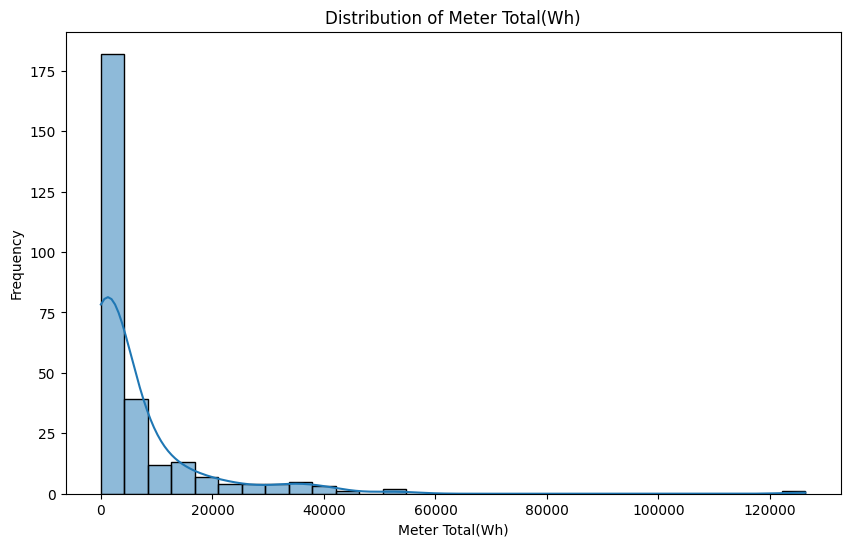

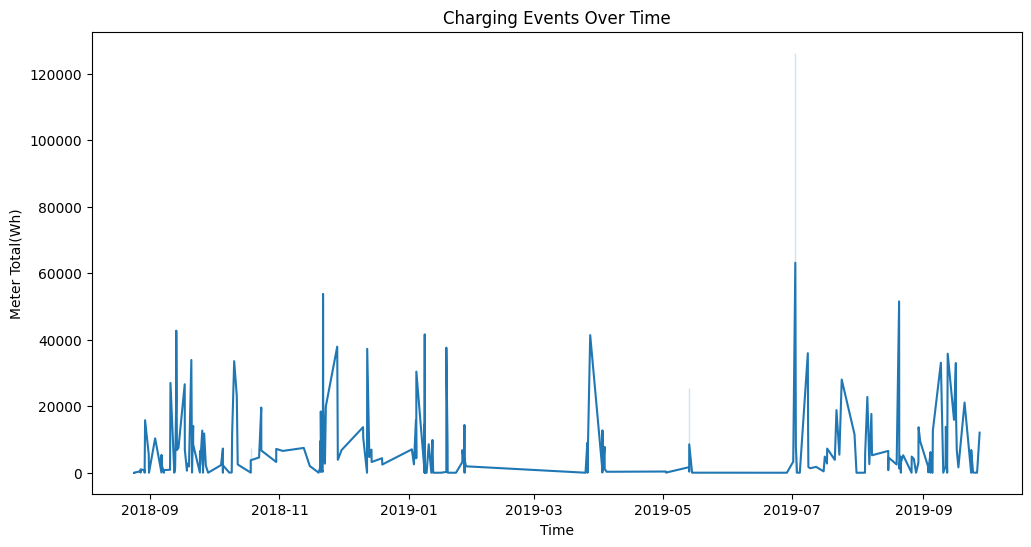

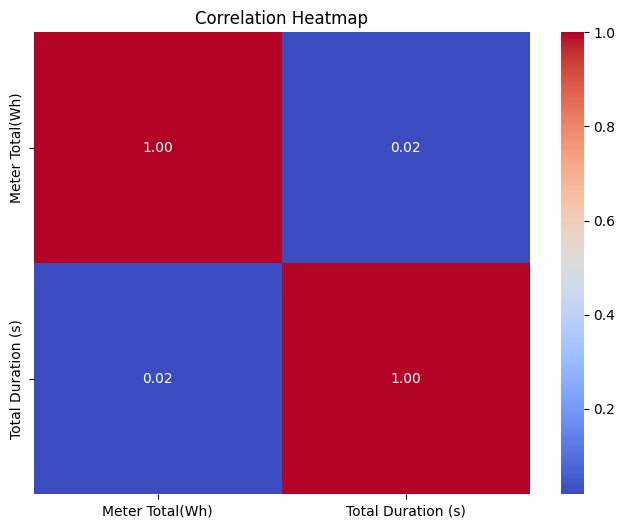

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'Meter Total(Wh)'
plt.figure(figsize=(10, 6))
sns.histplot(charging_events['Meter Total(Wh)'], bins=30, kde=True)
plt.title('Distribution of Meter Total(Wh)')
plt.xlabel('Meter Total(Wh)')
plt.ylabel('Frequency')
plt.show()

# Add space
print("\n\n")

# Time series plot of charging events
plt.figure(figsize=(12, 6))
sns.lineplot(data=charging_events, x='Start Time', y='Meter Total(Wh)')
plt.title('Charging Events Over Time')
plt.xlabel('Time')
plt.ylabel('Meter Total(Wh)')
plt.show()

# Add space
print("\n\n")

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = charging_events[['Meter Total(Wh)', 'Total Duration (s)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
